<a href="https://colab.research.google.com/github/hyeeeeeon/ProblemSolving/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Download

In [79]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("razanaqvi14/real-and-fake-news")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/real-and-fake-news


column: title, text, subject, date

In [80]:
import pandas as pd
import os

csv = pd.read_csv(os.path.join(path, "Fake.csv"))
fake_df = pd.DataFrame(csv)

csv = pd.read_csv(os.path.join(path, "True.csv"))
real_df = pd.DataFrame(csv)

In [81]:
# Download latest version
path = kagglehub.dataset_download("jillanisofttech/fake-or-real-news")

print("Path to dataset files:", path)

csv = pd.read_csv(os.path.join(path, "fake_or_real_news.csv"))

test_df = pd.DataFrame(csv)

Path to dataset files: /kaggle/input/fake-or-real-news


# title 단어 빈도 수 비교

In [82]:
import pandas as pd

# 각 파일에서 제목만 불러오기
#fake_title = fake_df['title'].dropna()
#real_title = real_df['title'].dropna()

# label 컬럼 추가해서 합치기 (비교용)
fake_df['label'] = 'FAKE'
real_df['label'] = 'REAL'

# 합치기
df = pd.concat([fake_df, real_df], ignore_index=True)

In [83]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['title_char_count'] = df['title'].apply(lambda x: len(x))

## 단어 수 비교

In [84]:
print(df.head())
print(df.index)
print(df.columns)

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  title_word_count  title_char_count  
0  December 31, 2017  FAKE                12                79  
1  December 31, 2017  FAKE                 8                69  
2  December 30, 2017  FAKE                15                90  
3  December 29, 20

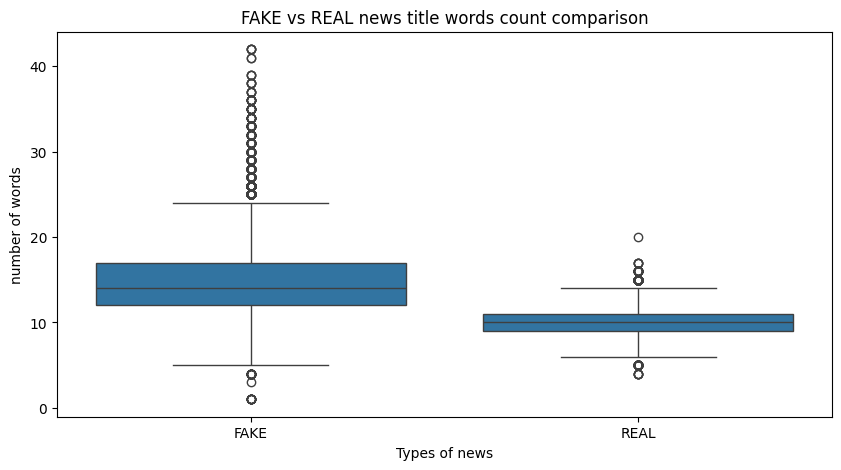

In [85]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='title_word_count', data=df)
plt.title("FAKE vs REAL news title words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

## 단어 수 분포 겹치기

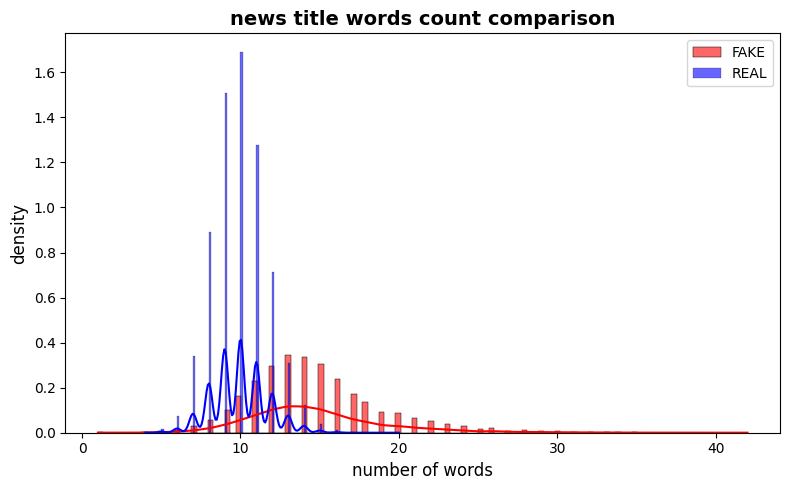

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['title_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['title_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 평균 단어 수 막대그래프 + 수치 표시

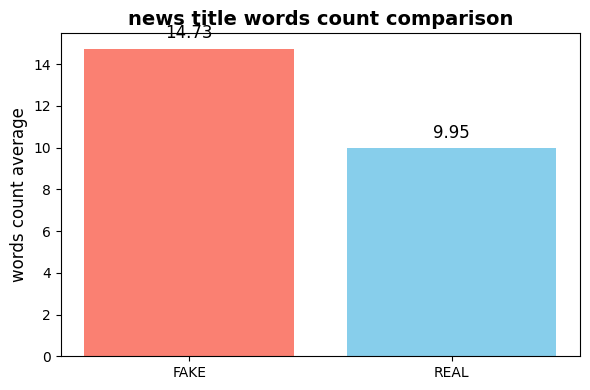

In [87]:
# 평균값 계산
avg_words = df.groupby('label')['title_word_count'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['title_word_count'], color=['salmon', 'skyblue'])

# 수치 텍스트 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# text 단어 빈도 수 비교

## 단어 수 비교

In [88]:
X_features = pd.DataFrame()
X_features['title_length'] = df['title_word_count'].copy()
X_features['label'] = df['label'].copy()
X_features

,title_length,label
0,12,FAKE
1,8,FAKE
2,15,FAKE
3,14,FAKE
4,11,FAKE
...,...,...
44893,9,REAL
44894,7,REAL
44895,7,REAL
44896,9,REAL


In [89]:
import pandas as pd

# 각 파일에서 제목만 불러오기
fake_text = fake_df['text'].dropna()
real_text = real_df['text'].dropna()

# label 컬럼 추가해서 합치기 (비교용)
fake_text['label'] = 'FAKE'
real_text['label'] = 'REAL'

# 합치기
df = pd.concat([fake_df, real_df], ignore_index=True)

df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df['text_char_count'] = df['text'].apply(lambda x: len(x))

In [90]:
X_features['text_length'] = df['text_word_count'].copy()
X_features

,title_length,label,text_length
0,12,FAKE,495
1,8,FAKE,305
2,15,FAKE,580
3,14,FAKE,444
4,11,FAKE,420
...,...,...,...
44893,9,REAL,466
44894,7,REAL,125
44895,7,REAL,320
44896,9,REAL,205


## 단어 수 분포 겹치기

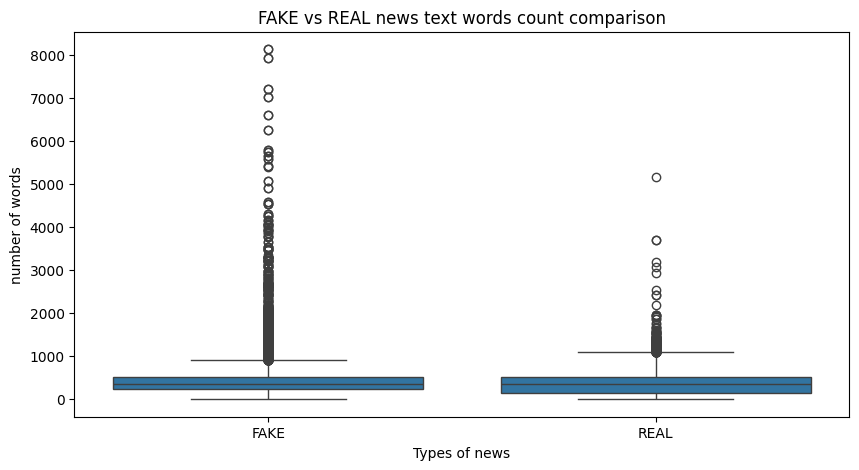

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='text_word_count', data=df)
plt.title("FAKE vs REAL news text words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

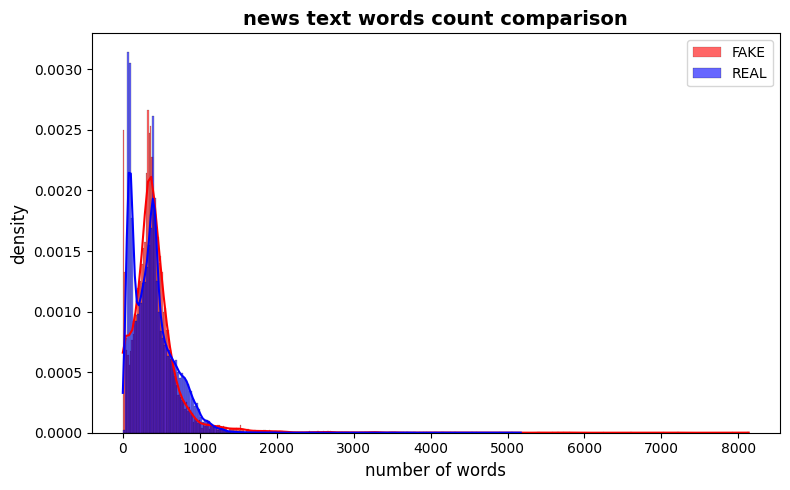

In [92]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['text_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['text_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 평균 단어 수 막대그래프 + 수치 표시

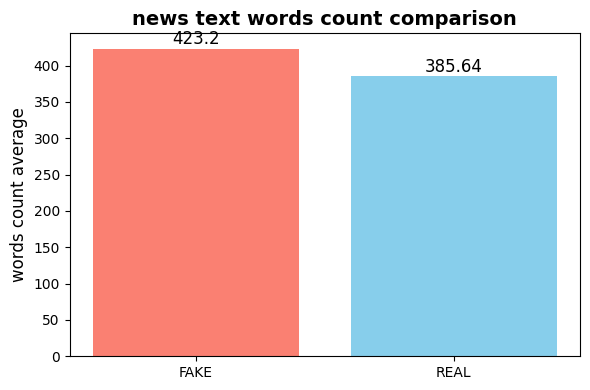

In [93]:
# 평균값 계산
avg_words = df.groupby('label')['text_word_count'].mean().reset_index()

# 막대그래프
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['text_word_count'], color=['salmon', 'skyblue'])

# 수치 텍스트 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# 감정 단어 분석
: 자극적이거나 클릭을 유도하는 단어 분석

In [94]:
import pandas as pd
from collections import Counter
import re

# 기본 정제 함수
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

# 데이터프레임에서 단어 리스트 만들기
def extract_words(df, label):
    words = []
    for title in df[df['label'] == label]['title'].dropna():
        words.extend(clean_and_tokenize(title))
    return words

# 단어 리스트 추출
fake_words = extract_words(df, 'FAKE')
real_words = extract_words(df, 'REAL')

# 빈도수 계산
fake_counts = Counter(fake_words)
real_counts = Counter(real_words)

In [95]:
# FAKE 단어가 REAL보다 몇 배 더 많은지 계산
word_ratio_data = []
for word in fake_counts:
    fake_count = fake_counts[word]
    real_count = real_counts.get(word, 0.5)  # 0이면 0.5로 보정
    ratio = fake_count / real_count
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

# DataFrame으로 정리 (사람이 해석할 수 있도록)
ratio_df = pd.DataFrame(word_ratio_data, columns=['word', 'fake_count', 'real_count', 'fake_to_real_ratio', 'total_count'])

# 최소 등장 기준으로 필터링
filtered_df = ratio_df[ratio_df['total_count'] >= 10].sort_values(by='fake_to_real_ratio', ascending=False)

# 상위 30개만 출력
print("📌 Words that often appear only in the fake news Top 30")
display(filtered_df.head(30))


📌 Words that often appear only in the fake news Top 30


,word,fake_count,real_count,fake_to_real_ratio,total_count
3155,hillarys,418,0.5,836.00000,418.5
5889,wow,372,0.5,744.00000,372.5
349,hilarious,262,0.5,524.00000,262.5
622,heres,245,0.5,490.00000,245.5
18245,boiler,205,0.5,410.00000,205.5
5473,lol,189,0.5,378.00000,189.5
10693,yr,179,0.5,358.00000,179.5
659,busted,179,0.5,358.00000,179.5
18246,ep,171,0.5,342.00000,171.5
2264,bombshell,166,0.5,332.00000,166.5


fake에 많이 나오는 단어 수를 가지고 real에서 얼마나 나오나 비교했는데 real에는 거의 안나오는 경우가 많아 비율이 다 크게 나옴...

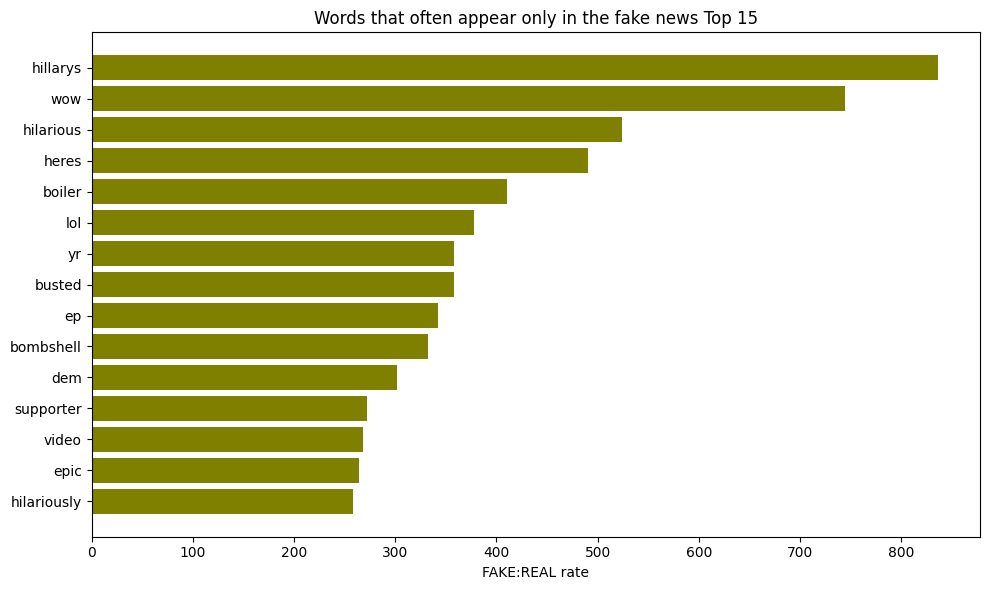

In [96]:
import matplotlib.pyplot as plt

top_words = filtered_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['fake_to_real_ratio'], color='olive')
plt.xlabel("FAKE:REAL rate")
plt.title("Words that often appear only in the fake news Top 15")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


FAKE와 REAL에 모두 등장하는 단어만 비교

In [97]:
# 두쪽에 모두 등장한 단어만 추출
common_words = set(fake_counts.keys()) & set(real_counts.keys())

word_ratio_data = []
for word in common_words:
    fake_count = fake_counts[word]
    real_count = real_counts[word]
    ratio = fake_count / (real_count + 1e-5)  # 보정값 아주 작게
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

In [98]:
# word_ratio_data: [(word, fake_count, real_count, ratio, total), ...]
common_df = pd.DataFrame(
    word_ratio_data,
    columns=["word", "fake_count", "real_count", "fake_to_real_ratio", "total_count"]
)

# 분석을 명확하게 하기 위해 최소 등장 횟수 필터링 (예: 5회 이상)
common_df = common_df[common_df['total_count'] >= 5]

# 비율 기준 정렬
common_df = common_df.sort_values(by='fake_to_real_ratio', ascending=False)


<ipython-input-99-951a6e040f62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')


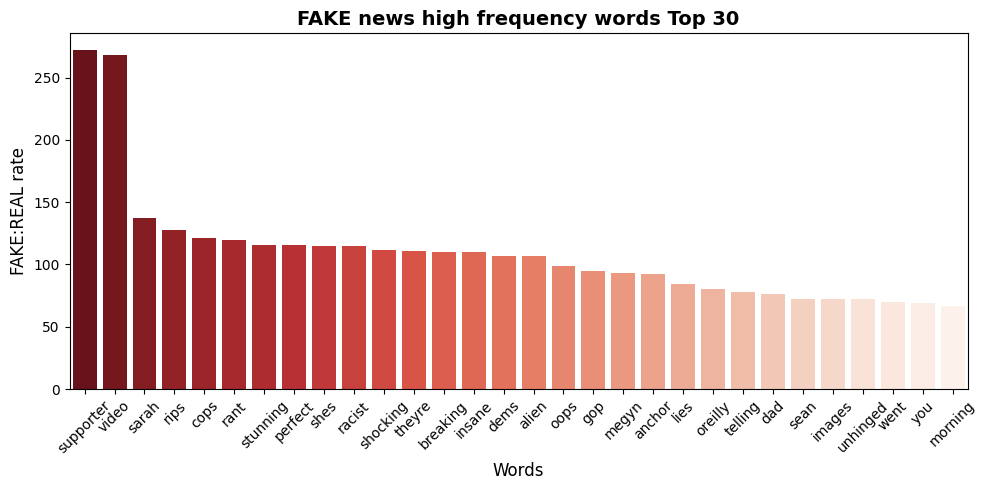

In [99]:
# 상위 30개 단어 시각화
top_words = common_df.head(30)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')
plt.title("FAKE news high frequency words Top 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("FAKE:REAL rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


비율이 아니라 "비율 차이"가 큰 단어를 정규화해서 추출

In [100]:
# 전체 단어 수
total_fake_words = sum(fake_counts.values())
total_real_words = sum(real_counts.values())

# 정규화된 비율 비교
word_ratio_data = []
for word in set(fake_counts.keys()) | set(real_counts.keys()):
    fake_freq = fake_counts[word] / total_fake_words
    real_freq = real_counts.get(word, 0) / total_real_words
    ratio = fake_freq / (real_freq + 1e-6)  # 비율 대비
    total = fake_counts[word] + real_counts.get(word, 0)
    word_ratio_data.append((word, fake_counts[word], real_counts.get(word, 0), ratio, total))


In [101]:
# 리스트 → DataFrame 변환
norm_df = pd.DataFrame(
    word_ratio_data,
    columns=['word', 'fake_count', 'real_count', 'normalized_fake_to_real_ratio', 'total_count']
)

# 필터링: 너무 적게 등장한 단어 제외 (예: 총 5회 이상 등장)
norm_df = norm_df[norm_df['total_count'] >= 5]

# 정렬: 비율이 높은 순
norm_df = norm_df.sort_values(by='normalized_fake_to_real_ratio', ascending=False)


<ipython-input-102-507ed5100b51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')


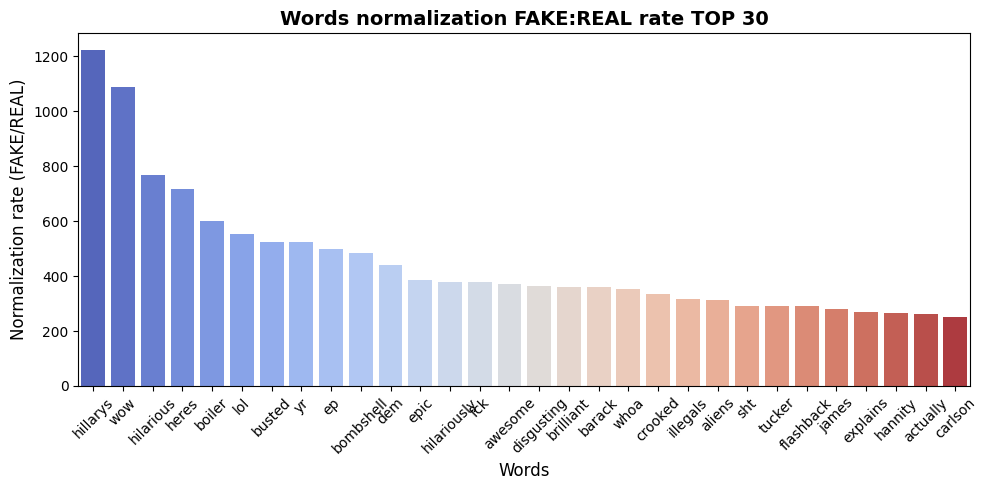

In [102]:
# 상위 30개 단어 선택
top_norm = norm_df.head(30)

# 막대그래프 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')

plt.title("Words normalization FAKE:REAL rate TOP 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("Normalization rate (FAKE/REAL)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


이렇게 해도 둘 다 비슷하게 단어 사용이 되어서 처음부터 타이틀 감정 분석을 해보기로 함

In [103]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 처음 한 번만 실행 필요
nltk.download('vader_lexicon')

# 감성 분석기 객체 생성
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [104]:
# 뉴스 제목 감성 점수 계산 (compound: 종합 감정 점수)
df['sentiment_score'] = df['title'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# 감성 점수 해석 (선택사항: 범주화)
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)


In [105]:
X_features['sentiment_score'] = df['sentiment_score'].copy()
X_features['sentiment_label'] = df['sentiment_label'].copy()
X_features

,title_length,label,text_length,sentiment_score,sentiment_label
0,12,FAKE,495,-0.7096,negative
1,8,FAKE,305,-0.3400,negative
2,15,FAKE,580,-0.2960,negative
3,14,FAKE,444,-0.2484,negative
4,11,FAKE,420,0.0000,neutral
...,...,...,...,...,...
44893,9,REAL,466,0.2333,positive
44894,7,REAL,125,0.0000,neutral
44895,7,REAL,320,0.0000,neutral
44896,9,REAL,205,0.0000,neutral


<ipython-input-106-786b99bdef0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})


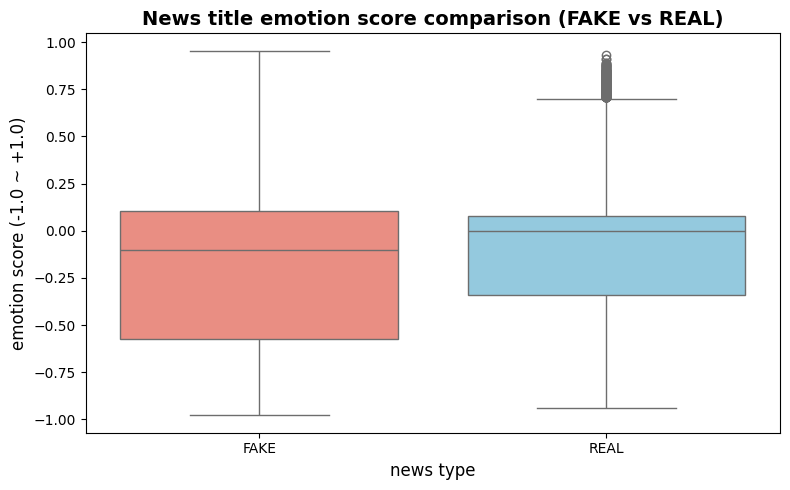

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("news type", fontsize=12)
plt.ylabel("emotion score (-1.0 ~ +1.0)", fontsize=12)
plt.tight_layout()
plt.show()

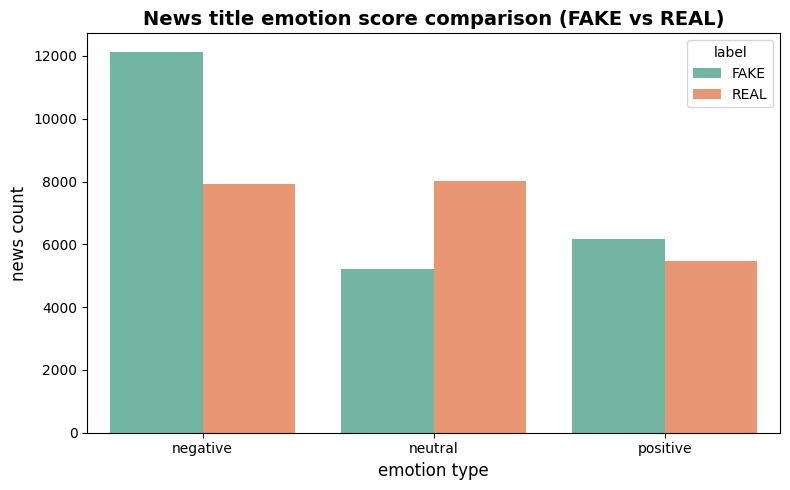

In [107]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', hue='label', palette='Set2')
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("emotion type", fontsize=12)
plt.ylabel("news count", fontsize=12)
plt.tight_layout()
plt.show()

In [108]:
import re
from nltk import pos_tag, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

POS_MAP = {
    'Noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'Verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjective': ['JJ', 'JJR', 'JJS']
}

# 단어만 추출 (문장부호 제거)
def clean_tokenize(text):
    tokens = word_tokenize(str(text))
    # 알파벳으로만 이루어진 단어만 필터링 (문장부호, 숫자 제외)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return tokens

In [109]:
from nltk import pos_tag
from collections import Counter

def extract_pos_words(text_list, pos_type):
    words = []
    for text in text_list.dropna():
        tokens = clean_tokenize(text)  # 여기에 적용!
        tagged = pos_tag(tokens)
        words += [word for word, tag in tagged if tag in POS_MAP[pos_type]]
    return Counter(words).most_common(20)


In [110]:
# FAKE와 REAL 분리
df_fake = df[df['label'] == 'FAKE']
df_real = df[df['label'] == 'REAL']

# 품사별 단어 추출
results = {
    'FAKE_title': {},
    'FAKE_text': {},
    'REAL_title': {},
    'REAL_text': {}
}

for pos_type in ['Noun', 'Verb', 'Adjective']:
    results['FAKE_title'][pos_type] = extract_pos_words(df_fake['title'], pos_type)
    results['FAKE_text'][pos_type] = extract_pos_words(df_fake['text'], pos_type)
    results['REAL_title'][pos_type] = extract_pos_words(df_real['title'], pos_type)
    results['REAL_text'][pos_type] = extract_pos_words(df_real['text'], pos_type)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
def display_pos_table(result_dict, label, section):
    print(f"\n🔍 {label.upper()} 뉴스 — {section.upper()} 품사별 단어 TOP 15")
    for pos in ['Noun', 'Verb', 'Adjective']:
        print(f"\n▶ {pos}")
        print(pd.DataFrame(result_dict[f"{label}_{section}"][pos], columns=['word', 'count']))

# FAKE 뉴스
display_pos_table(results, 'FAKE', 'title')
display_pos_table(results, 'FAKE', 'text')

# REAL 뉴스
display_pos_table(results, 'REAL', 'title')
display_pos_table(results, 'REAL', 'text')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_pos_words(result_dict, label, section, pos):
    # 데이터 가져오기
    word_data = result_dict[f'{label}_{section}'][pos]
    df = pd.DataFrame(word_data, columns=['word', 'count'])

    # 시각화
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='word', y='count', palette='viridis')
    plt.title(f"{label} News — {section} — {pos} Top Words", fontsize=14, weight='bold')
    plt.xlabel("Words", fontsize=12)
    plt.ylabel("Text Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# FAKE 뉴스 제목에서 자주 나온 형용사
plot_top_pos_words(results, 'FAKE', 'title', 'Adjective')

# REAL 뉴스 본문에서 자주 나온 명사
plot_top_pos_words(results, 'REAL', 'text', 'Noun')

# 반복적으로 실행하고 싶다면
for label in ['FAKE', 'REAL']:
    for section in ['title', 'text']:
        for pos in ['Noun', 'Verb', 'Adjective']:
            plot_top_pos_words(results, label, section, pos)


In [ ]:
def get_pos_compare_df(result_dict, section, pos_type, top_n=20):
    fake_words = dict(result_dict[f'FAKE_{section}'][pos_type])
    real_words = dict(result_dict[f'REAL_{section}'][pos_type])

    # 공통 단어 + FAKE에서만, REAL에서만 있는 단어 포함
    all_words = set(fake_words) | set(real_words)

    data = []
    for word in all_words:
        data.append({
            'word': word,
            'FAKE': fake_words.get(word, 0),
            'REAL': real_words.get(word, 0)
        })

    df_comp = pd.DataFrame(data)
    df_comp['total'] = df_comp['FAKE'] + df_comp['REAL']

    # 자주 등장하는 단어 상위 N개만 선택
    df_top = df_comp.sort_values(by='total', ascending=False).head(top_n)
    return df_top


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pos_comparison(df, pos_type, section):
    df_melted = df.melt(id_vars='word', value_vars=['FAKE', 'REAL'], var_name='label', value_name='count')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, y='word', x='count', hue='label', palette={'FAKE': 'salmon', 'REAL': 'skyblue'})
    plt.title(f"{section.upper()} — {pos_type} Compare Words (FAKE vs REAL)", fontsize=14, weight='bold')
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()


In [ ]:
# 예: 모든 품사에 대해 title 기준 비교
for pos in ['Noun', 'Verb', 'Adjective']:
    df_pos = get_pos_compare_df(results, section='title', pos_type=pos)
    plot_pos_comparison(df_pos, pos_type=pos, section='title')


In [ ]:
# 예: 모든 품사에 대해 text 기준 비교
for pos in ['Noun', 'Verb', 'Adjective']:
    df_pos = get_pos_compare_df(results, section='text', pos_type=pos)
    plot_pos_comparison(df_pos, pos_type=pos, section='text')


In [111]:
X_features

,title_length,label,text_length,sentiment_score,sentiment_label
0,12,FAKE,495,-0.7096,negative
1,8,FAKE,305,-0.3400,negative
2,15,FAKE,580,-0.2960,negative
3,14,FAKE,444,-0.2484,negative
4,11,FAKE,420,0.0000,neutral
...,...,...,...,...,...
44893,9,REAL,466,0.2333,positive
44894,7,REAL,125,0.0000,neutral
44895,7,REAL,320,0.0000,neutral
44896,9,REAL,205,0.0000,neutral


| 피처 이름             | 설명                  |
| ----------------- | ------------------- |
| `title_length`    | 제목의 단어 수            |
| `text_length`     | 본문의 단어 수            |
| `sentiment_score` | 감성 분석 점수 (compound) |
| `sentiment_label` | 감성 분석 점수 범위  |

| 특성       | 요약 설명                               |
| -------- | ----------------------------------- |
| 타이틀 단어 수 | 진짜 뉴스는 평균 10단어 내외                   |
| 텍스트 길이   | 진짜 뉴스는 평균 400단어 이하                  |
| 감정 점수    | 진짜 뉴스는 중립 범위 (-0.25 \~ 0.25) 비율 ↑   |
| 감정 단어    | 중립 단어가 가장 많이 사용됨                    |
| 동사 사용    | 타이틀: says / 텍스트: said가 REAL에서 빈도 높음 |
| 품사 사용    | FAKE 뉴스에서 형용사(자극 표현) 사용률 ↑          |


In [112]:
y = pd.DataFrame()
y = X_features['label'].map({'FAKE': 1, 'REAL': 0})
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
44893,0
44894,0
44895,0
44896,0


In [113]:
X_features = X_features.drop(columns=['label'])
X_features

,title_length,text_length,sentiment_score,sentiment_label
0,12,495,-0.7096,negative
1,8,305,-0.3400,negative
2,15,580,-0.2960,negative
3,14,444,-0.2484,negative
4,11,420,0.0000,neutral
...,...,...,...,...
44893,9,466,0.2333,positive
44894,7,125,0.0000,neutral
44895,7,320,0.0000,neutral
44896,9,205,0.0000,neutral


In [114]:
X_features.to_csv("input.csv", index=False, encoding='utf-8')
y.to_csv("output.csv", index=False, encoding='utf-8')